In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re


import warnings
warnings.filterwarnings('ignore')

In [2]:
blacklist = pd.read_csv('host_detections.csv')
blacklist.head()

,host,listOfDetections,count
0,011rtr6kjtjdrhkyl68pkrjthbdfntmk.servehttp.com,0,0
1,02b123c.netsolhost.com,0,0
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",3
3,0lilioo0l0o00lilil.info,"[u'MyWOT', u'SCUMWARE', u'SURBL', u'hpHosts', ...",7
4,0n1u4og97yt85sy8faitxwt.addirectory.org,0,0


In [3]:
blacklist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 3 columns):
host                9836 non-null object
listOfDetections    9836 non-null object
count               9836 non-null int64
dtypes: int64(1), object(2)
memory usage: 230.6+ KB


## Длина строки

In [4]:
# найдем количество символов, из которых состоит хост

blacklist['lenght'] = blacklist['host'].apply(len)
blacklist.head()

,host,listOfDetections,count,lenght
0,011rtr6kjtjdrhkyl68pkrjthbdfntmk.servehttp.com,0,0,46
1,02b123c.netsolhost.com,0,0,22
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",3,6
3,0lilioo0l0o00lilil.info,"[u'MyWOT', u'SCUMWARE', u'SURBL', u'hpHosts', ...",7,23
4,0n1u4og97yt85sy8faitxwt.addirectory.org,0,0,39


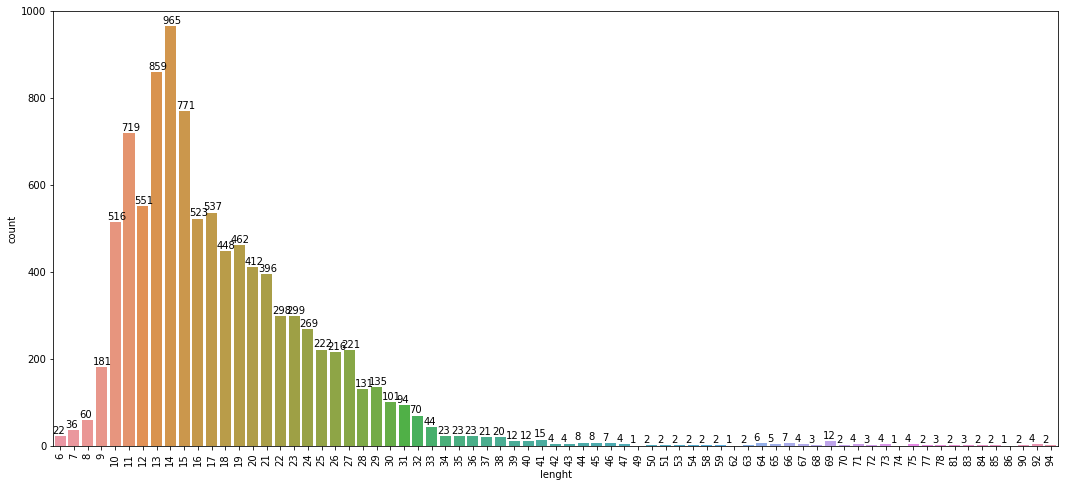

In [5]:
plt.figure(figsize=(18,8))
plt.xticks(rotation = 90)
ax = sns.countplot(x='lenght', data = blacklist)
ax.set(ylim = (0, 1000))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()-0.2,height+5, '%.0f'%(height))
plt.show()

# Количество символов в хосте дает только небольшое представленны того, отнести нас данный хост в черный список или нет.
# Можно с увереностью сказать, что если больше 30 символов в хосте - можно с большой вероятностью отнести в
# черный список данный хост.

## Наличие чисел в названии хоста

In [6]:
# посмотрим, состоит ли хост только из букв, или еще из цифр и сколько их участвует в названии хоста.

blacklist['sum_of_digits'] = blacklist['host'].apply(lambda x: sum(c.isdigit() for c in x))
blacklist.head()

,host,listOfDetections,count,lenght,sum_of_digits
0,011rtr6kjtjdrhkyl68pkrjthbdfntmk.servehttp.com,0,0,46,6
1,02b123c.netsolhost.com,0,0,22,5
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",3,6,1
3,0lilioo0l0o00lilil.info,"[u'MyWOT', u'SCUMWARE', u'SURBL', u'hpHosts', ...",7,23,5
4,0n1u4og97yt85sy8faitxwt.addirectory.org,0,0,39,8


In [7]:
blacklist.groupby('sum_of_digits', as_index = False)['host'].count()

,sum_of_digits,host
0,0,6428
1,1,1023
2,2,428
3,3,246
4,4,174
5,5,118
6,6,89
7,7,82
8,8,85
9,9,121


In [8]:
# Чем больше цифр в хосте, тем больше вероятность отправить хост в черный список.
# оптимальное количество числе в хосте 0 и 1.

## Со скольки частей состоит название  хост

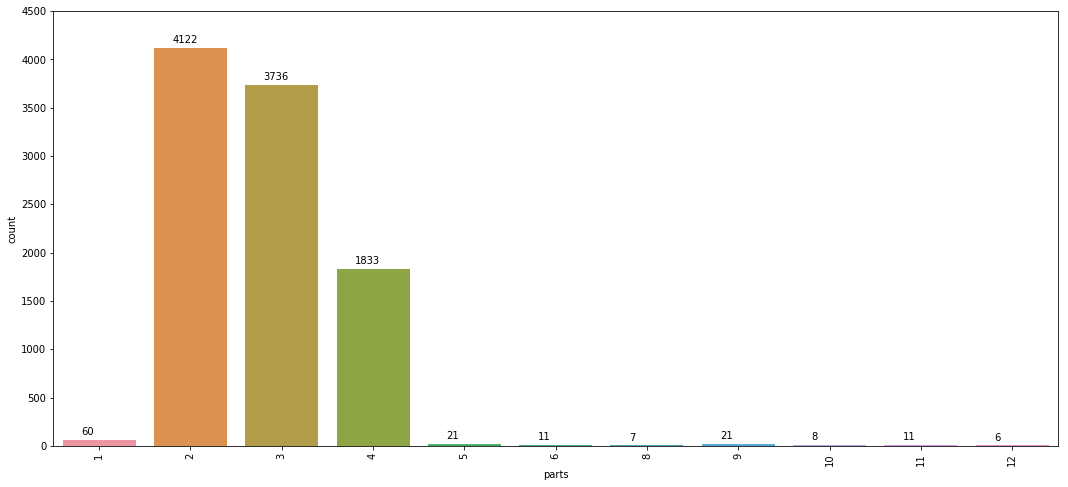

In [9]:
# имя каждого хоста должно обьязятельно состоять из 2 частей: название хоста и домен.
# посморит, состоят ли именна только из 2 частей, или более


blacklist['parts'] = blacklist['host'].apply(lambda x: len(x.split('.')))
#blacklist.head()

plt.figure(figsize=(18,8))
plt.xticks(rotation = 90)
ax = sns.countplot(x='parts', data = blacklist)
ax.set(ylim = (0,4500))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.2,height+50, '%.0f'%(height))
plt.show()

In [10]:
# рассмотрим наблюдения, состоящие из 1 части

blacklist[blacklist['parts'] == 1]['host'].head(10)

# одни только числа. в черный список.

30    1122102749
52    1334166638
53    1334166651
65    1446469814
70    1506812532
71    1539393606
72    1539495499
73    1539495587
74    1540987173
75    1540987231
Name: host, dtype: object

In [11]:
# рассмотрим наблюдения, состоящие из 2 части
# так как последняя часть хоста это домен, то переделаем немного наш массив
 
part_2 = blacklist[blacklist['parts'] == 2]
part_2.head()

,host,listOfDetections,count,lenght,sum_of_digits,parts
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",3,6,1,2
3,0lilioo0l0o00lilil.info,"[u'MyWOT', u'SCUMWARE', u'SURBL', u'hpHosts', ...",7,23,5,2
6,0v2.info,0,0,8,2,2
7,0wu.ru,0,0,6,1,2
8,0y1.ru,0,0,6,2,2


In [12]:
# создадим дополнительные 2 колонки
# percent_of_digits - соотношение количества чисел в названии домена к общему числу всех символов. Логика простая, чем
# больше данное соотношение, тем большее верояность что данный хост надо занести в черный список.
# perc_max_word_in_host - название каждого "нормального" хоста должно содержать нормальные английские слова. Расмотрим
# все возможные англ слова, которые можно получить из названия хоста. выберем максимально длинное из них, и найдем соотношение
# данного слова к общему числу символом. чем меньше соотношение, тем больше вероятность попасть в черный список.



from nltk import everygrams
import enchant
d = enchant.Dict("en_US")

def df_process(df):
    # Удалим лишние колонки
    df.drop(['lenght','parts','sum_of_digits'], axis = 1, inplace = True)
    
    # Вытянем исключительно имя хоста без домена
    df['name'] = df['host'].apply(lambda x: x.split('.')[0])
    
    # Удалим все цифры и спец символи, дабы получить точное буквенное название хоста
    df['clean_word'] = df['name'].apply(lambda x: "".join((c if c.isalpha() else '') for c in x))
    
    # Создадим колонку со всем возможными вариантами слов, из которых состоит название хоста. 
    # Воспользуемся для этого стандартным словарем из пакета "enchant"
    df['all_possible_words'] = df['clean_word'].apply(lambda x: [''.join(_ngram) for _ngram in everygrams(x) if d.check(''.join(_ngram)) and len(_ngram) > 1])
    #df['last_word'] = [''.join(_ngram) for _ngram in everygrams(df['name']) if d.check(''.join(_ngram)) and len(_ngram) > 1][-1]
    
    # Найдем длину чистого хоста
    df['len_word'] = df['clean_word'].apply(len)
    
    # так как при создании всех возможных вариантов слов из домена функция автоматически перебирает от меньшего количества
    # букв в слове к большего, то в списке из возможных слов максимально длинное слово находится на последнем месте.
    # найдем количество символов в этом слове.
    df['len_poss_word'] = df['all_possible_words'].apply(lambda x: len(x[-1]) if len(x)>0 else 0)
    
    # найдем соотношение длины возможного слово из хоста к общей длине хоста
    # единственное что не учитывается, что хост может состоять из двух/трёх нормальных слов, например allcolors.
    df['perc_max_word_in_host'] = round((df['len_poss_word']/df['len_word'])*100,0)
    
    # количество символом в хосте
    df['lenght_of_host'] = df['host'].apply(lambda x: len(x.split('.')[0]))
    
    # количество чисел в названии хоста
    df['sum_of_digits'] = df['host'].apply(lambda x: sum(c.isdigit() for c in x))
    
    # какой процент хоста состоит из числе
    df['percent_of_digits'] = round((df['sum_of_digits']/df['lenght_of_host'])*100,0)
    
    # not use
    #df['perc_word_to_digit'] = round((df['sum_of_digits']/df['len_word'])*100,0)
    
    # удалим лишнее
    df.drop(['name', 'len_word', 'len_poss_word'], axis = 1, inplace = True)
    return df


df_process(part_2)
part_2.head(10)

,host,listOfDetections,count,clean_word,all_possible_words,perc_max_word_in_host,lenght_of_host,sum_of_digits,percent_of_digits
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",3,hb,[],0.0,3,1,33.0
3,0lilioo0l0o00lilil.info,"[u'MyWOT', u'SCUMWARE', u'SURBL', u'hpHosts', ...",7,lilioololilil,[lo],15.0,18,5,28.0
6,0v2.info,0,0,v,[],0.0,3,2,67.0
7,0wu.ru,0,0,wu,[],0.0,3,1,33.0
8,0y1.ru,0,0,y,[],0.0,3,2,67.0
34,11ncat.info,[u'GoogleSafeBrowsing'],1,ncat,"[ca, at, cat]",75.0,6,2,33.0
66,1488swat.asia,0,0,swat,"[at, swat]",100.0,8,4,50.0
83,158foxtrott.com,"[u'BitDefender', u'GoogleSafeBrowsing']",2,foxtrott,"[ox, tr, fox, rot, trot, foxtrot]",88.0,11,3,27.0
246,1cedilyutra.info,0,0,cedilyutra,"[ed, tr]",20.0,11,1,9.0
248,1q2w.org,[u'GoogleSafeBrowsing'],1,qw,[],0.0,4,2,50.0


In [13]:
part_2.groupby('percent_of_digits', as_index = False)['host'].count().sort_values('percent_of_digits', ascending = False)

# чем больше percent_of_digits , тем большая вероятность отправить хост в черный список. 

,percent_of_digits,host
40,100.0,3
39,71.0,2
38,67.0,9
37,62.0,5
36,60.0,3
35,57.0,2
34,50.0,21
33,47.0,1
32,45.0,2
31,44.0,5


In [14]:
# Посмотрим, сколько числе есть в названии хоста

part_2.groupby('sum_of_digits', as_index = False)['host'].count()


# оптимальное число чисел в хосте ноль. при наличии хотя бы одного числа есть смысл проверить на вредоносные программы.
# если количество чисел больше чем 1, с большой вероятностью можно отнести в черный список.

,sum_of_digits,host
0,0,3664
1,1,247
2,2,106
3,3,52
4,4,34
5,5,7
6,7,6
7,9,2
8,10,4


In [15]:
# Посмотрим, сколько числе есть в названии хоста

part_2.groupby('perc_max_word_in_host', as_index = False)['host'].count()

# 0% говорит нам о том, что и имени хоста использовались разный набор букв, которые не образу.т ни единного слова
# очень маленький процент говорит нам о том, что в именни хоста используються короткие анлийские слова
# или сочетание литер, процент которых очень мал/невелик в сравнении с общей длинной хоста без домена и чисел.
# большой % может говорить о том, что использовались одно полноценное анлийское слово. 

,perc_max_word_in_host,host
0,0.0,143
1,12.0,2
2,13.0,4
3,14.0,1
4,15.0,14
5,16.0,2
6,17.0,6
7,18.0,55
8,19.0,8
9,20.0,49


## Создадим черный список слов


In [16]:
# Создадим список слов, которые могут использовать боты. Этот список может быть добавлен именами людей, животными и тому подобное
# Если в именны хоста находит одно из предложенных слов, то большая вероятного того , что это вредоносный сайт


blacklist_words = ['xxx', 'porno', 'tube', 'girls', 'night', 'lesbian', 'cat', 'sam', 'fox']

part_2['bots_words_len'] = part_2['all_possible_words'].apply(lambda x: len([s for s in x if s in blacklist_words]))
part_2['bots_words'] = part_2['all_possible_words'].apply(lambda x: [s for s in x if s in blacklist_words])
part_2.head(15)

,host,listOfDetections,count,clean_word,all_possible_words,perc_max_word_in_host,lenght_of_host,sum_of_digits,percent_of_digits,bots_words_len,bots_words
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",3,hb,[],0.0,3,1,33.0,0,[]
3,0lilioo0l0o00lilil.info,"[u'MyWOT', u'SCUMWARE', u'SURBL', u'hpHosts', ...",7,lilioololilil,[lo],15.0,18,5,28.0,0,[]
6,0v2.info,0,0,v,[],0.0,3,2,67.0,0,[]
7,0wu.ru,0,0,wu,[],0.0,3,1,33.0,0,[]
8,0y1.ru,0,0,y,[],0.0,3,2,67.0,0,[]
34,11ncat.info,[u'GoogleSafeBrowsing'],1,ncat,"[ca, at, cat]",75.0,6,2,33.0,1,[cat]
66,1488swat.asia,0,0,swat,"[at, swat]",100.0,8,4,50.0,0,[]
83,158foxtrott.com,"[u'BitDefender', u'GoogleSafeBrowsing']",2,foxtrott,"[ox, tr, fox, rot, trot, foxtrot]",88.0,11,3,27.0,1,[fox]
246,1cedilyutra.info,0,0,cedilyutra,"[ed, tr]",20.0,11,1,9.0,0,[]
248,1q2w.org,[u'GoogleSafeBrowsing'],1,qw,[],0.0,4,2,50.0,0,[]


In [17]:
part_2.groupby('bots_words_len')['host'].count()

bots_words_len
0    4027
1      93
2       2
Name: host, dtype: int64

In [18]:
# Как видно, даже небольшой список ботовых слов дает свой результат. При этом, использовалиь только пару слов.
# Посмотрим какие слова были найдены 

words = part_2[part_2['bots_words_len'] != 0][['host','bots_words']]
s = words.apply(lambda x: pd.Series(x['bots_words']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'words'
words = words.join(s)

words.groupby('words')['host'].count().sort_values(ascending = False)

words
cat        46
tube       15
porno      12
xxx         6
lesbian     6
fox         6
night       4
girls       2
Name: host, dtype: int64

In [19]:
# Черный список слов оправдывает свои ожидания.

## Cпец.символы

In [20]:
part_2['special_characters'] = part_2['host'].apply(lambda x: len(re.findall(r'[-@#_!?]',x)))

# Проверым что мы получили в конечном итоге

piv = part_2.groupby('special_characters', as_index = False)['host'].count()
piv['percent'] = round((piv['host']/piv['host'].sum())*100,2)
piv

,special_characters,host,percent
0,0,3718,90.20
1,1,337,8.18
2,2,49,1.19
3,3,13,0.32
4,4,3,0.07
5,5,2,0.05


In [21]:
# Как видим из результат, спецсимволи в именах хостов встречаються почти в 10% случаев.

## Подсчитаем количество символов подряд

In [22]:
# создадам 2 функцию 
# 1 будет считать количество одинаковых символов подряд. и потом найдем сумму всех повторяющихся символов, больше 1
# 2 покажет самое большое количество повторений подряд

from itertools import groupby

def duplicate_character(x):
    x = ''.join(f'{char}{len(list(group))}' for char, group in groupby(x))
    x = " ".join((c if c.isdigit() else '') for c in x)
    x = x.replace('1', ' ')
    x = sum(c.isdigit() for c in x)
    return x

#def max_dublicate2(x):
#    x = ''.join(f'{char}{len(list(group))}' for char, group in groupby(x))
#    x = " ".join((c if c.isdigit() else '') for c in x)
#    if max(x.split()) == '1':
#        x2 = 0
#    else:
#        x = x.replace('1', '').replace(' ','')
#        x2 = max(x.split())
#    return x2

def max_dublicate(x):
    x = ''.join(f'{char}{len(list(group))}' for char, group in groupby(x))
    x = " ".join((c if c.isdigit() else '') for c in x)
    x = x.replace('1', '').replace(' ', '')+str(1)
    if max(x) == '1':
        x = 0
    else:
        x = max(x)
    return x


In [23]:
# воспользуемся колонкой clean_word, так как нас интересует только буквенные значения
part_2['dublicates'] = part_2['clean_word'].apply(duplicate_character)
part_2['max_dublicate'] = part_2['clean_word'].apply(max_dublicate)
part_2.head(10)

,host,listOfDetections,count,clean_word,all_possible_words,perc_max_word_in_host,lenght_of_host,sum_of_digits,percent_of_digits,bots_words_len,bots_words,special_characters,dublicates,max_dublicate
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",3,hb,[],0.0,3,1,33.0,0,[],0,0,0
3,0lilioo0l0o00lilil.info,"[u'MyWOT', u'SCUMWARE', u'SURBL', u'hpHosts', ...",7,lilioololilil,[lo],15.0,18,5,28.0,0,[],0,1,2
6,0v2.info,0,0,v,[],0.0,3,2,67.0,0,[],0,0,0
7,0wu.ru,0,0,wu,[],0.0,3,1,33.0,0,[],0,0,0
8,0y1.ru,0,0,y,[],0.0,3,2,67.0,0,[],0,0,0
34,11ncat.info,[u'GoogleSafeBrowsing'],1,ncat,"[ca, at, cat]",75.0,6,2,33.0,1,[cat],0,0,0
66,1488swat.asia,0,0,swat,"[at, swat]",100.0,8,4,50.0,0,[],0,0,0
83,158foxtrott.com,"[u'BitDefender', u'GoogleSafeBrowsing']",2,foxtrott,"[ox, tr, fox, rot, trot, foxtrot]",88.0,11,3,27.0,1,[fox],0,1,2
246,1cedilyutra.info,0,0,cedilyutra,"[ed, tr]",20.0,11,1,9.0,0,[],0,0,0
248,1q2w.org,[u'GoogleSafeBrowsing'],1,qw,[],0.0,4,2,50.0,0,[],0,0,0


In [24]:
part_2.groupby(['dublicates'], as_index = False)['host'].count()

# так как в англ языке есть много слов, в которых подряд идут 2 одинаковых символа, то не стоит скидывать этот вариант со счетов

,dublicates,host
0,0,2984
1,1,952
2,2,167
3,3,17
4,4,2


In [25]:
part_2.groupby(['dublicates','max_dublicate'], as_index = False)['host'].count()

,dublicates,max_dublicate,host
0,0,0,2984
1,1,2,884
2,1,3,62
3,1,4,2
4,1,5,4
5,2,2,149
6,2,3,15
7,2,4,2
8,2,5,1
9,3,2,15


## Проверим антивирусы

In [26]:
def proccess(X):
    X = "".join(X.split(','))
    X = X.replace("u'",'')
    X = re.sub(r'[^\w\s]','',X).split(' ')
    return X


blacklist['new_col'] = blacklist['listOfDetections'].apply(proccess)

s = blacklist.apply(lambda x: pd.Series(x['new_col']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'detections'

df = blacklist.drop(['listOfDetections', 'new_col'], axis = 1).join(s)
df.head()

,host,count,lenght,sum_of_digits,parts,detections
0,011rtr6kjtjdrhkyl68pkrjthbdfntmk.servehttp.com,0,46,6,3,0
1,02b123c.netsolhost.com,0,22,5,3,0
2,0hb.ru,3,6,1,2,MyWOT
2,0hb.ru,3,6,1,2,SURBL
2,0hb.ru,3,6,1,2,BitDefender


In [27]:
print('В массиву {} уникальный антивирус.'.format(df['detections'].nunique()))
print(df['detections'].unique())

В массиву 31 уникальный антивирус.
['0' 'MyWOT' 'SURBL' 'BitDefender' 'SCUMWARE' 'hpHosts' 'DrWeb'
 'GoogleSafeBrowsing' 'DNSBH' 'SpamhausDBL' 'BrowserDefender' 'Avira'
 'None' 'DShield' 'MalwareDomainList' 'YandexSafeBrowsing' 'Sucuri'
 'urlQuery' 'AVGThreatLabs' 'z_protect' 'ThreatLog' 'URLVir' 'Quttera'
 'MalwarePatrol' 'CRDF' 'Fortinet' 'ZeuS' 'Tracker' '' 'Malc0de'
 'PhishTank']


In [28]:
piv1 = df.pivot_table(index = 'detections', values = 'count', aggfunc={'count':['sum']}).sort_values('sum', ascending=False).reset_index()
piv1

,detections,sum
0,MyWOT,3452
1,BitDefender,2989
2,GoogleSafeBrowsing,1948
3,SURBL,1816
4,SCUMWARE,1796
5,None,1009
6,DNSBH,970
7,AVGThreatLabs,880
8,BrowserDefender,845
9,SpamhausDBL,828


In [29]:
# Удалим строки со значением в антивирусах равные "0", "" и "None"

df = df[df['detections']!='0']
df = df[df['detections']!='None']
df = df[df['detections']!='']

piv1 = df.pivot_table(index = 'detections', values = 'count', aggfunc={'count':['sum']}).sort_values('sum', ascending=False).reset_index()
piv1['percent'] = round((piv1['sum']/piv1['sum'].sum())*100,2)
piv1

,detections,sum,percent
0,MyWOT,3452,17.94
1,BitDefender,2989,15.53
2,GoogleSafeBrowsing,1948,10.12
3,SURBL,1816,9.44
4,SCUMWARE,1796,9.33
5,DNSBH,970,5.04
6,AVGThreatLabs,880,4.57
7,BrowserDefender,845,4.39
8,SpamhausDBL,828,4.30
9,DrWeb,756,3.93


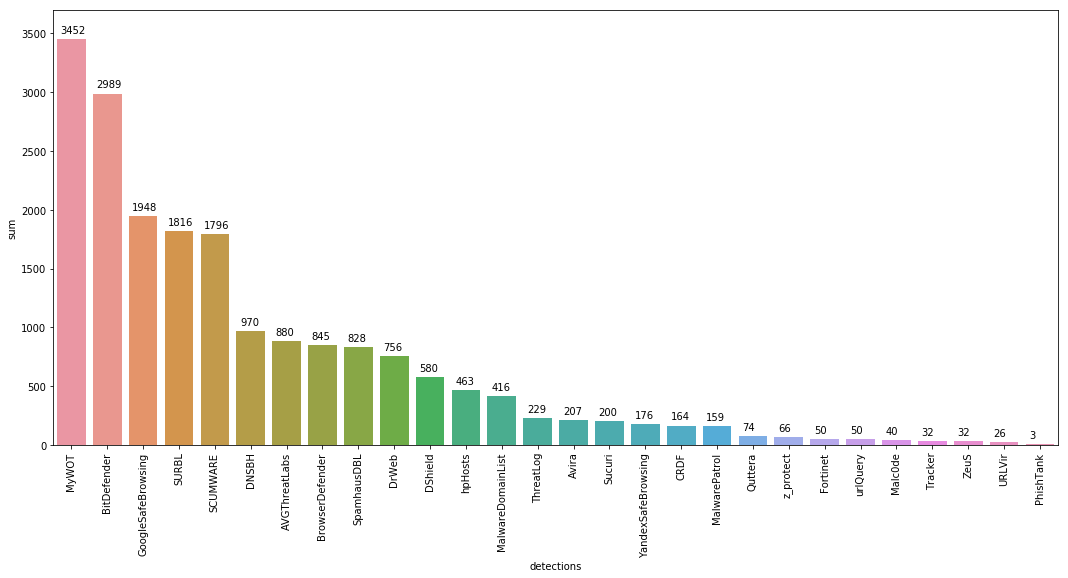

In [30]:
plt.figure(figsize=(18,8))
plt.xticks(rotation = 90)
ax = sns.barplot(x='detections', y='sum', data=piv1)
ax.set(ylim = (0, 3700))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.1,height+50, '%.0f'%(height))
plt.show()

In [31]:
print("Топ 5 антивирусов:")
print(piv1['detections'].head().values)

Топ 5 антивирусов:
['MyWOT' 'BitDefender' 'GoogleSafeBrowsing' 'SURBL' 'SCUMWARE']


## Проверим домены

In [32]:
# выберем значения из хоста, которые проверяли антивирусом

df['domains'] = df['host'].apply(lambda x: x.split('.')[-1])
piv2 = df.pivot_table(index = 'domains', values = 'count', aggfunc={'count':['sum']}).sort_values('sum', ascending=False).reset_index()
piv2['percent'] = round((piv2['sum']/piv2['sum'].sum())*100,2)
piv2

,domains,sum,percent
0,com,6841,35.54
1,ru,2670,13.87
2,tk,1384,7.19
3,info,1235,6.42
4,in,1040,5.40
5,net,1036,5.38
6,org,659,3.42
7,cc,473,2.46
8,biz,390,2.03
9,uk,253,1.31


In [33]:
piv3 = df.groupby(['domains', 'detections'], as_index = False)['count'].sum().sort_values('count', ascending = False)
piv3.head(10)

,domains,detections,count
107,com,MyWOT,1105
96,com,BitDefender,994
109,com,SCUMWARE,879
103,com,GoogleSafeBrowsing,712
110,com,SURBL,526
369,ru,MyWOT,511
371,ru,SURBL,378
390,tk,MyWOT,331
391,tk,SURBL,323
97,com,BrowserDefender,317


In [34]:
# выберем антивирусы, которые проверяли более 100 хостов и для каждого из них найдем топ-5 домейнов для проверки.
df2 = pd.DataFrame(columns = ['domains','detections', 'count'])

uniq = piv1[piv1['sum']>100]['detections'].unique()

for word in uniq:
    time_df = piv3[piv3['detections'] == word].sort_values('count', ascending = False).head()
    df2 = pd.concat([df2,time_df])

df2

,domains,detections,count
107,com,MyWOT,1105
369,ru,MyWOT,511
390,tk,MyWOT,331
219,info,MyWOT,225
289,net,MyWOT,169
96,com,BitDefender,994
385,tk,BitDefender,270
361,ru,BitDefender,224
280,net,BitDefender,164
314,org,BitDefender,161


## проверка антивируса к новым переменным

In [35]:

dff = part_2.drop(['listOfDetections'], axis = 1).join(s)
dff.head()

,host,count,clean_word,all_possible_words,perc_max_word_in_host,lenght_of_host,sum_of_digits,percent_of_digits,bots_words_len,bots_words,special_characters,dublicates,max_dublicate,detections
2,0hb.ru,3,hb,[],0.0,3,1,33.0,0,[],0,0,0,MyWOT
2,0hb.ru,3,hb,[],0.0,3,1,33.0,0,[],0,0,0,SURBL
2,0hb.ru,3,hb,[],0.0,3,1,33.0,0,[],0,0,0,BitDefender
3,0lilioo0l0o00lilil.info,7,lilioololilil,[lo],15.0,18,5,28.0,0,[],0,1,2,MyWOT
3,0lilioo0l0o00lilil.info,7,lilioololilil,[lo],15.0,18,5,28.0,0,[],0,1,2,SCUMWARE


In [36]:
dff = dff[(dff['detections']!='0')&(dff['detections']!='None')&(dff['detections']!='')]

In [37]:
dff.groupby(['lenght_of_host','detections'], as_index = False)['host'].count().sort_values('lenght_of_host', ascending = False).head(30)

,lenght_of_host,detections,host
295,31,BitDefender,2
294,30,SpamhausDBL,2
293,30,SURBL,2
292,30,MyWOT,2
291,30,GoogleSafeBrowsing,2
290,30,AVGThreatLabs,2
289,29,hpHosts,2
288,29,MyWOT,2
287,29,DrWeb,2
286,29,BitDefender,2


In [38]:
dff.groupby(['percent_of_digits','detections'], as_index = False)['host'].count().sort_values('percent_of_digits', ascending = False)

,percent_of_digits,detections,host
137,67.0,MyWOT,1
136,67.0,DrWeb,1
135,67.0,BitDefender,2
134,62.0,SCUMWARE,1
133,62.0,AVGThreatLabs,1
132,60.0,MyWOT,1
131,60.0,GoogleSafeBrowsing,1
130,60.0,BitDefender,1
129,50.0,hpHosts,2
128,50.0,MyWOT,6


## проверим какие антивирусы не показали результат с черным листом

In [39]:
domains = pd.read_csv('mal_domains.csv', header= None)
domains.columns = ['host','count','detections_full']
domains.head()

,host,count,detections_full
0,abccat.org,49,"Bkav,MicroWorld-eScan,nProtect,CMC,McAfee,Malw..."
1,zorg.jkub.com,54,"Bkav,TotalDefense,MicroWorld-eScan,nProtect,CM..."
2,aiwrm.dnepr.com,37,"MicroWorld-eScan,nProtect,CAT-QuickHeal,McAfee..."
3,bgueeew.tk,34,"nProtect,CAT-QuickHeal,McAfee,TheHacker,NOD32,..."
4,hysteonlinexp.com,48,"Bkav,MicroWorld-eScan,nProtect,CAT-QuickHeal,M..."


In [40]:
new_df = pd.merge(blacklist,domains, on = 'host', how = 'left')
new_df.head(5)

,host,listOfDetections,count_x,lenght,sum_of_digits,parts,new_col,count_y,detections_full
0,011rtr6kjtjdrhkyl68pkrjthbdfntmk.servehttp.com,0,0,46,6,3,[0],37.0,"MicroWorld-eScan,nProtect,CAT-QuickHeal,McAfee..."
1,02b123c.netsolhost.com,0,0,22,5,3,[0],NaN,NaN
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",3,6,1,2,"[MyWOT, SURBL, BitDefender]",36.0,"Bkav,MicroWorld-eScan,McAfee,TheHacker,K7AntiV..."
3,0lilioo0l0o00lilil.info,"[u'MyWOT', u'SCUMWARE', u'SURBL', u'hpHosts', ...",7,23,5,2,"[MyWOT, SCUMWARE, SURBL, hpHosts, DrWeb, Googl...",16.0,"F-Secure,AntiVir,ESET-NOD32,McAfee-GW-Edition,..."
4,0n1u4og97yt85sy8faitxwt.addirectory.org,0,0,39,8,3,[0],32.0,"F-Secure,DrWeb,VIPRE,AntiVir,TrendMicro,McAfee..."


In [41]:
# Удалил лишнее, которое нам явно сейчас не надо
new_df.dropna(inplace = True, axis = 0)
new_df.drop(['count_x','count_y','lenght','sum_of_digits','parts'], axis = 1, inplace = True)
new_df.head(5)

,host,listOfDetections,new_col,detections_full
0,011rtr6kjtjdrhkyl68pkrjthbdfntmk.servehttp.com,0,[0],"MicroWorld-eScan,nProtect,CAT-QuickHeal,McAfee..."
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']","[MyWOT, SURBL, BitDefender]","Bkav,MicroWorld-eScan,McAfee,TheHacker,K7AntiV..."
3,0lilioo0l0o00lilil.info,"[u'MyWOT', u'SCUMWARE', u'SURBL', u'hpHosts', ...","[MyWOT, SCUMWARE, SURBL, hpHosts, DrWeb, Googl...","F-Secure,AntiVir,ESET-NOD32,McAfee-GW-Edition,..."
4,0n1u4og97yt85sy8faitxwt.addirectory.org,0,[0],"F-Secure,DrWeb,VIPRE,AntiVir,TrendMicro,McAfee..."
5,0td4nbde7.ttl60.com,"[u'SpamhausDBL', u'BitDefender']","[SpamhausDBL, BitDefender]","Bkav,MicroWorld-eScan,nProtect,CMC,CAT-QuickHe..."


In [42]:
# Удалим строки со значением в антивирусах равные "0", "" и "None"

def proccess(X):
    X = "".join(X.split(','))
    X = X.replace("u'",'')
    X = re.sub(r'[^\w\s]','',X).split(' ')
    return X


new_df['new_col'] = new_df['listOfDetections'].apply(proccess)
s = new_df.apply(lambda x: pd.Series(x['new_col']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'detections'

short_list = s.unique()


# произведем те же манипуляции c колонкой со всеми антивирусами
new_df['new_col'] = new_df['detections_full'].apply(lambda x: x.split(','))
d = new_df.apply(lambda x: pd.Series(x['new_col']),axis=1).stack().reset_index(level=1, drop=True)
d.name = 'full_detections'

full_list = d.unique()

In [43]:
print('В массиве blacklist  {} уникальных антивирусов.'.format(s.nunique()))
print('В массиве mal_domains  {} уникальных антивирусов.'.format(d.nunique()))

В массиве blacklist  30 уникальных антивирусов.
В массиве mal_domains  64 уникальных антивирусов.


In [44]:
# найдем антивирусы, которые есть общем списке из mal_domains, но не выстрелили в blacklist

uniq_list = [word for word in full_list if word not in short_list]
len(uniq_list)

# [word for word in full_list if word in short_list] - всего 3 совпадения. малость не такой результат собирался я обнаружить

61

In [45]:
# покажем какие антивирусы не зафиксировали ничего

new_df['antivir_exists'] = new_df['new_col'].apply(lambda x: [s for s in x if s in uniq_list])
new_df.drop(['detections_full','new_col'], axis = 1, inplace = True)

new_df = new_df[new_df['listOfDetections'] != '0']

a = new_df.apply(lambda x: pd.Series(x['antivir_exists']),axis=1).stack().reset_index(level=1, drop=True)
a.name = 'antivir_exists'

new_df = new_df.drop(['antivir_exists'], axis = 1).join(a)

new_df.head()

,host,listOfDetections,antivir_exists
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",Bkav
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",MicroWorld-eScan
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",McAfee
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",TheHacker
2,0hb.ru,"[u'MyWOT', u'SURBL', u'BitDefender']",K7AntiVirus


In [46]:
new_df.groupby('antivir_exists')['host'].count().sort_values(ascending = False)

antivir_exists
AntiVir                 1880
Ikarus                  1876
Kaspersky               1874
Comodo                  1866
GData                   1859
Avast                   1858
Microsoft               1858
Sophos                  1851
McAfee                  1845
McAfee-GW-Edition       1836
AVG                     1812
ESET-NOD32              1784
Symantec                1784
TrendMicro-HouseCall    1757
TrendMicro              1751
VIPRE                   1686
NANO-Antivirus          1643
Emsisoft                1523
F-Secure                1489
Panda                   1433
Norman                  1433
K7AntiVirus             1367
AhnLab-V3               1306
MicroWorld-eScan        1289
VBA32                   1275
CAT-QuickHeal           1263
Antiy-AVL               1260
nProtect                1247
Jiangmin                1192
Qihoo-360               1188
K7GW                    1187
TheHacker               1075
Ad-Aware                1050
ViRobot                 1002

## ВЫВОДЫ.

1. Первое на что стоит обратить внимание, со скольки частей состоит название хоста. Оптимальное число частей - 2: название 
самого хоста и домен. Как было увиденно, наличие больше 3 частей в название хоста неприемлеммо. Наличие одной части - 
выбросы. 

2. Проверить длину строки (количество символов в названии хоста). Название хоста хоть и может быть очень коротким,
но длинное название врятли будут давать. Более-менее адекватная блина хоста от 7-20 символов.

3. Создать список слов, которые используются чаще ботами, например: sex, porno, xxx, tube and so on, и проверить, состоит ли
    название хоста из хоят бы одного данного слова. При положительном ответе можно рассматривать данный хост как вредоносный.

4. Проверить наличие чисел в названии хоста. Оптимальное количество числе 0, максимум 1, и то следует в этом случае уже проверить данный хост на вредоносность. Больше 1 числа уже несет вред.



5. Также стоит сразу проверить на процентное соотношение чисел к названию хоста. Чем больше данное соотношение, тем более подозрительным является данный хост.

6. Каждый нормальный хост должен состоят из английских слов или транслитов, который есть в любом словаре (ну или сленговых слов). Поэтому стоит проверить, состоит ли данный хост из словавных слов, или это набор букв. И проверить соотношение длины максимально возможного слово или словосочетаний к длине хоста. Стоит только отметить, что если первоначально длина хоста короткая, то вероятность найти совпадение будет очень. И такие хосты стоит проверять дополнительно. 

7. Также имя хоста не должно содержать различных спец.символов. Особенно часто использут "-".